# Python's Main Scientific Libraries

Prepared for the DIIS workshop, April 2019.

Written by John Stachurski

## Libraries

Anaconda comes with many libraries for scientific computing pre-installed.

The most important ones are

* NumPy
* SciPy
* Matplotlib
* Pandas
* Numba


Attributes are loaded into memory using `import`

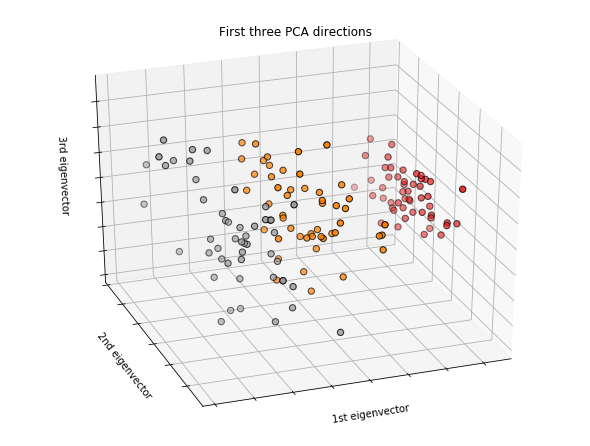

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

%matplotlib inline

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### NumPy

A library for fast array/vector/matrix processing in Python.

In [2]:
import numpy as np

#### Elementary functions

With NumPy we can access standard functions like $\exp$, $\sin$, $\cos$, etc.

In [3]:
x = 0
np.exp(x)

1.0

In [4]:
np.cos(x)

1.0

In [5]:
np.sin(x)

0.0

#### Arrays

We can make an "array" of evenly spaced numbers:

In [6]:
x = np.linspace(-3, 3, 5)

In [7]:
x

array([-3. , -1.5,  0. ,  1.5,  3. ])

The functions listed above work directly on arrays:

In [8]:
np.exp(x)

array([ 0.04978707,  0.22313016,  1.        ,  4.48168907, 20.08553692])

In [9]:
np.sin(x)

array([-0.14112001, -0.99749499,  0.        ,  0.99749499,  0.14112001])

Basic arithmetic operators are "vectorized"

In [10]:
x

array([-3. , -1.5,  0. ,  1.5,  3. ])

In [11]:
2 * x

array([-6., -3.,  0.,  3.,  6.])

In [12]:
2 * x - 1

array([-7., -4., -1.,  2.,  5.])

#### Reductions

In [13]:
np.sum(x)

0.0

In [14]:
np.mean(x)

0.0

In [15]:
np.std(x)

2.1213203435596424

In [16]:
np.max(x)

3.0

In [17]:
np.min(x)

-3.0

#### Matrix algebra

In [18]:
A = np.random.randn(2, 2)
B = np.random.randn(2, 3)

In [19]:
A

array([[ 0.47656001,  0.06821744],
       [ 0.74948006, -2.22233138]])

In [20]:
B

array([[-0.04702801, -0.73076708, -0.71222662],
       [ 0.73410118,  0.22043198, -0.02756279]])

In [21]:
A @ B  # matrix multiplication

array([[ 0.02766683, -0.33321707, -0.34129899],
       [-1.66666264, -1.03756826, -0.47254599]])

#### Types and speed

Arrays have to be homogeneous in terms of data type

In [22]:
x

array([-3. , -1.5,  0. ,  1.5,  3. ])

In [23]:
x[0] = "foobar"

ValueError: could not convert string to float: 'foobar'

Homogeneity makes them fast and efficient.

In [24]:
x = np.random.randn(1_000_000)

In [25]:
np.sum(2 * x - x**2)

-997849.9430103729

In [26]:
%%timeit 

np.sum(2 * x - x**2)

2.97 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%%timeit

y = 0.0
for val in x:
    y = y + 2 * val - val**2

402 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### JIT compilation via Numba

In [28]:
from numba import jit

@jit
def sum_vec(v):
    y = 0.0
    for val in v:
        y = y + 2 * val - val**2
    return y

In [29]:
sum_vec(x)

-997849.9430103679

In [30]:
%%timeit 

sum_vec(x)

2.13 ms ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Matplotlib

The next line says "show all figures inside the browser"

In [31]:
%matplotlib inline

Now let's import the main Python plotting library, called Matplotlib.

In [32]:
import matplotlib.pyplot as plt

#### Our first plot

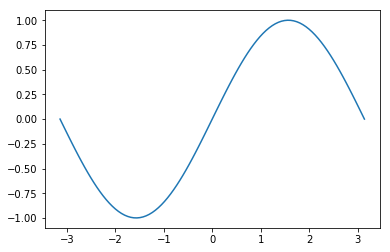

In [33]:
fig, ax = plt.subplots()

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
ax.plot(x, y)


A plot with two lines and a legend:

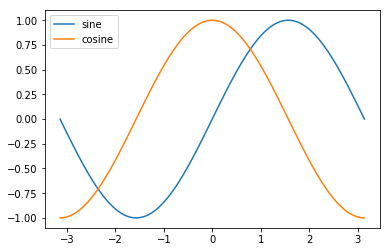

In [34]:
fig, ax = plt.subplots()

y1 = np.sin(x)
y2 = np.cos(x)
ax.plot(x, y1, label='sine')
ax.plot(x, y2, label='cosine')
ax.legend()

### An Example

In [35]:
def g(x, β=0.5):
    return x * np.exp(-β * x)

In [36]:
g(1)

0.6065306597126334

In [37]:
g(10)

0.06737946999085467

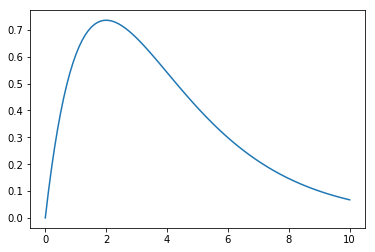

In [38]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y = g(x)
ax.plot(x, y)

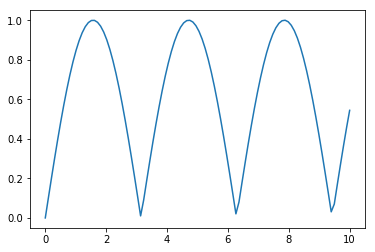

In [39]:
def h(x):
    return np.abs(np.sin(x))

fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y = h(x)
ax.plot(x, y)

### SciPy

A useful collection of subpackages for numerical methods.

* linear algebra
* numerical optimization and root finding
* statistics and probability
* interpolation and approximation
* etc.

In [40]:
from scipy.linalg import eigvals

In [41]:
eigvals(np.random.randn(2, 2))

array([1.21125548+0.50174877j, 1.21125548-0.50174877j])

In [44]:
def f(x):
    return x**3

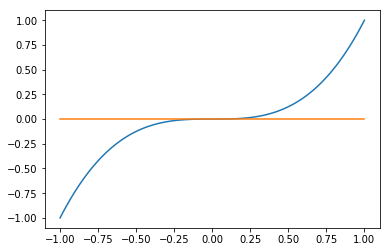

In [46]:
fig, ax = plt.subplots()
x = np.linspace(-1, 1, 100)
ax.plot(x, f(x))
ax.plot(x, 0 * x)

In [47]:
from scipy.optimize import brentq

Find the root of $f$ on the interval $[-1, 1]$

In [48]:
brentq(f, -1, 1)

0.0

### Exercises

Plot the function

$$ f(x) = \sin(2x) - 2 \sin(x) $$

on the interval $[-10, 10]$.

In [61]:
for i in range(20):
    print("solution below!")

solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!


In [63]:
def f(x):
    return np.sin(2 * x) - 2 * np.sin(x)

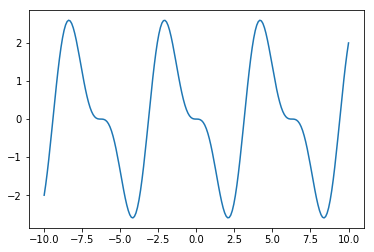

In [65]:
fig, ax = plt.subplots()

x = np.linspace(-10, 10, 200)

ax.plot(x, f(x))